<a href="https://colab.research.google.com/github/jpsicilia/car-decision-tree/blob/main/Arbol_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install category_encoders

In [89]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import category_encoders as ce
from imblearn.over_sampling import SMOTE

In [90]:
df=pd.read_csv('car_evaluation.csv',header=None)

In [91]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [92]:
for col in col_names:

    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


###Declarar el vector de features y la variable target

In [93]:
X=df.drop(["class"],axis=1)
y=df["class"]

###Dividir el dataset en train e test
El parámetro stratify en funciones como train_test_split de scikit-learn se usa para asegurar que la proporción de clases en el conjunto de entrenamiento y prueba sea similar a la del conjunto original


In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42,stratify=y)

###Encode variables categoricas


In [95]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [96]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
200,1,1,1,1,1,1
1631,2,2,2,1,1,1
504,3,3,3,2,1,2
1204,4,2,2,1,2,3
123,1,1,2,1,2,2


In [97]:
# Aplicar SMOTE solo en train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Paso 1: Definir las combinaciones que quieres probar
parametros = {

    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,3,4],
}

# Paso 2: Crear el objeto GridSearchCV
busqueda = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=parametros,
    cv=5,  # Validación cruzada (5 particiones)
    scoring='f1',  # Puedes cambiar a accuracy, recall, etc.
    n_jobs=-1  # Usa todos los núcleos del CPU
)

# Paso 3: Entrenar
busqueda.fit(X_train_resampled, y_train_resampled)

# Paso 4: Ver los mejores parámetros encontrados
print("Mejores parámetros:", busqueda.best_params_)






Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [101]:
mejor_modelo = RandomForestClassifier(
    **busqueda.best_params_,
    random_state=42
)
mejor_modelo.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=3, random_state=42)

In [102]:
mejor_modelo.score(X_train, y_train)

0.7140350877192982

In [103]:
y_pred=mejor_modelo.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7280


In [105]:
y_pred_train = mejor_modelo.predict(X_train)

y_pred_train

array(['acc', 'good', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good',
       'acc', 'good', 'unacc', 'good', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'good', 'unacc', 'unacc', 'unacc', 'vgood', 'vgood',
       'unacc', 'unacc', 'unacc', 'good', 'vgood', 'unacc', 'vgood',
       'good', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'good',
       'unacc', 'unacc', 'vgood', 'vgood', 'unacc', 'unacc', 'acc',
       'vgood', 'good', 'good', 'good', 'unacc', 'unacc', 'vgood',
       'vgood', 'acc', 'vgood', 'good', 'unacc', 'unacc', 'unacc',
       'unacc', 'vgood', 'acc', 'unacc', 'good', 'vgood', 'unacc',
       'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'good', 'unacc',
       'good', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc',
       'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'unacc', 'unacc', 'acc

In [106]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7140


In [107]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(mejor_modelo.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(mejor_modelo.score(X_test, y_test)))

Training set score: 0.7140
Test set score: 0.7280


--- Classification Report ---
              precision    recall  f1-score   support

         acc       0.60      0.34      0.43       257
        good       0.18      0.78      0.30        46
       unacc       0.98      0.83      0.90       811
       vgood       0.35      1.00      0.52        44

    accuracy                           0.73      1158
   macro avg       0.53      0.74      0.54      1158
weighted avg       0.84      0.73      0.76      1158



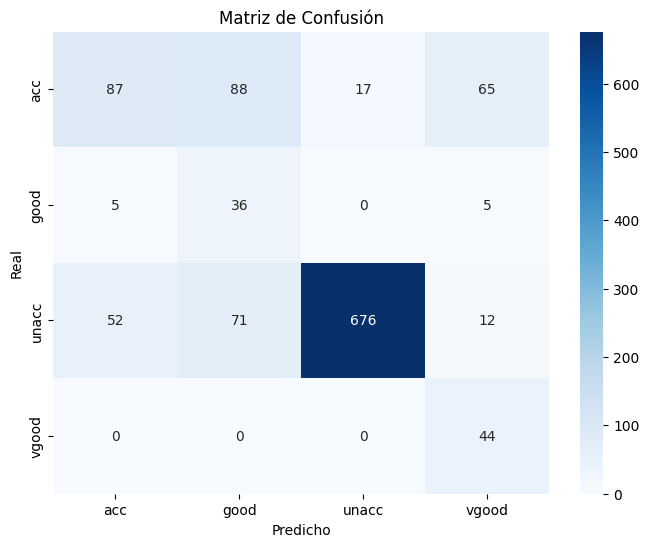

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

# Generar predicciones en test
y_pred = mejor_modelo.predict(X_test)

# Reporte de clasificación
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Matriz de confusión (mejor visualizada)
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mejor_modelo.classes_, yticklabels=mejor_modelo.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

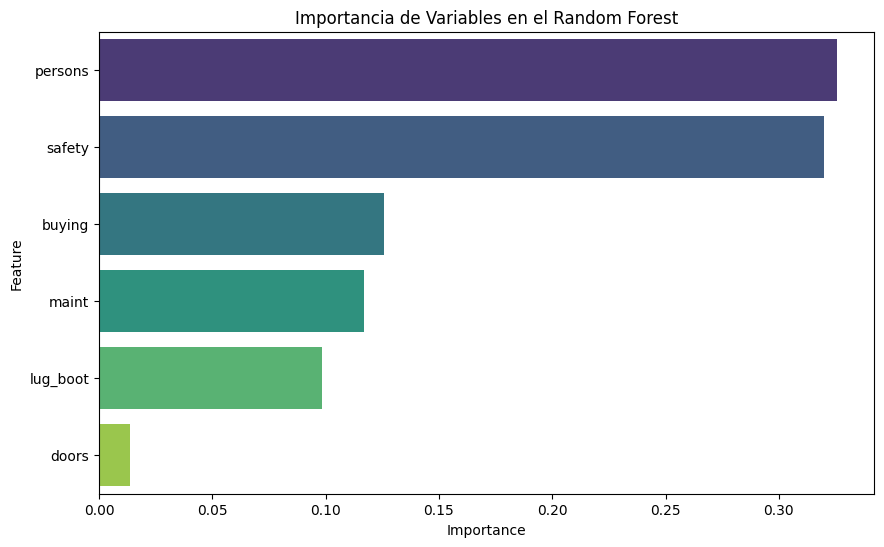

In [109]:
# Obtener importancia de características
importancias = mejor_modelo.feature_importances_
features = X_train.columns

# Crear DataFrame y ordenar
df_importancia = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancia = df_importancia.sort_values('Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importancia, palette='viridis')
plt.title('Importancia de Variables en el Random Forest')
plt.show()

In [110]:
from sklearn.model_selection import cross_val_score

# Usar el mejor modelo obtenido
scores = cross_val_score(
    mejor_modelo,
    X_train_resampled,
    y_train_resampled,
    cv=5,  # 5 particiones
    scoring='accuracy'
)

print("Accuracy promedio en validación cruzada:", scores.mean())
print("Desviación estándar:", scores.std())  # Si es alta, el modelo es inestable

Accuracy promedio en validación cruzada: 0.7757170846394984
Desviación estándar: 0.024504314652759603


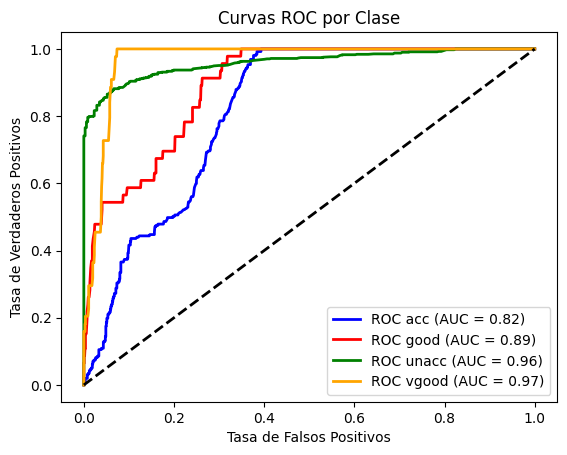

In [111]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarizar las etiquetas (para multiclase)
y_test_bin = label_binarize(y_test, classes=mejor_modelo.classes_)
y_pred_proba = mejor_modelo.predict_proba(X_test)

# Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(mejor_modelo.classes_)
colors = cycle(['blue', 'red', 'green', 'orange'])

for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC {0} (AUC = {1:0.2f})'.format(mejor_modelo.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase')
plt.legend(loc="lower right")
plt.show()